In [1]:
library (edgeR)
library (tidyverse)
library (openxlsx)
library (reshape2)
library (readr)

Loading required package: limma

── Attaching packages ────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

In [3]:
getwd()

[1] "/research/groups/RawdataCarlberg/2022_Doseresponse-final"

In [4]:
dropdupl <- read.table(file = "./data/salmon.merged.gene_counts_annotated_CA2021.tsv", header = TRUE, sep = '\t')

In [5]:
#str (dropdupl)
dim (dropdupl)

[1] 24518    84

In [6]:
dropduplPr = dropdupl %>%
  filter (., gene_biotype == "protein coding")

In [7]:
dim (dropduplPr)

[1] 19142    84

In [8]:
seqdata <- dropduplPr[ , c(2:ncol(dropduplPr))]  #get rid of dupl ensembl id

x = seqdata %>% 
  select(., -(Avgexpression:strand)) %>% 
  round ()

rownames(x) = seqdata$hgnc_symbol

In [9]:
head (x)

EtOH_x_24h_R1 EtOH_x_24h_R2 EtOH_x_24h_R3 EtOH_x_4h_R1 EtOH_x_4h_R2
EEF1A1 60776         36756         46582         37846        35744       
THBS1  21645         11172         20194         42044        39283       
AHNAK  32367         20048         31599         19041        17841       
ACTB   54916         28940         35311         13456        12195       
HLA-B  27600         16239         20550         15298        14933       
FTH1   45559         24433         32383         14522        13259       
       EtOH_x_4h_R3 EtOH_x_8h_R1 EtOH_x_8h_R2 EtOH_x_8h_R3 V125D3_0.1nM_24h_R1
EEF1A1 29848        41801        61262        67443        57886              
THBS1  28412        56997        82207        70708        60399              
AHNAK  14409        24314        35440        40691        35368              
ACTB   10414        19043        27443        27814        41755              
HLA-B  12659        17392        25332        28814        24743              
FTH1   11156        19831        28909        31354        37053              
       ⋯ V25D3_100nM_24h_R3 V25D3_250nM_24h_R1 V25D3_250nM_24h_R2
EEF1A1 ⋯ 43091              25409              22843             
THBS1  ⋯ 25624              19140              10146             
AHNAK  ⋯ 22532              13910              12039             
ACTB   ⋯ 42316              22888              15615             
HLA-B  ⋯ 21185              12147              10923             
FTH1   ⋯ 31154              17514              12758             
       V25D3_250nM_24h_R3 V25D3_500nM_24h_R1 V25D3_500nM_24h_R2
EEF1A1 57377              55799              29250             
THBS1  32297               1746               1501             
AHNAK  29595              24406              12939             
ACTB   45978              20795              10764             
HLA-B  28545              25048              13672             
FTH1   39859              15217               8751             
       V25D3_500nM_24h_R3 V25D3_750nM_24h_R1 V25D3_750nM_24h_R2
EEF1A1 45732              70411              48950             
THBS1   2099               2188               1568             
AHNAK  19461              28051              18860             
ACTB   16951              24917              15899             
HLA-B  21049              32761              21154             
FTH1   13293              16888              12036             
       V25D3_750nM_24h_R3
EEF1A1 23126             
THBS1    652             
AHNAK  10170             
ACTB    8425             
HLA-B  11332             
FTH1    5483

In [10]:
annotation = seqdata %>% 
select(., (ensembl_gene_id:strand))

head (annotation)
dim (annotation)

ensembl_gene_id entrezgene_id external_gene_name hgnc_symbol
2 ENSG00000156508  1915         EEF1A1             EEF1A1     
3 ENSG00000137801  7057         THBS1              THBS1      
4 ENSG00000124942 79026         AHNAK              AHNAK      
5 ENSG00000075624    60         ACTB               ACTB       
6 ENSG00000234745  3106         HLA-B              HLA-B      
7 ENSG00000167996  2495         FTH1               FTH1       
  description                                        chromosome_name
2 eukaryotic translation elongation factor 1 alpha 1 6              
3 thrombospondin 1                                   15             
4 AHNAK nucleoprotein                                11             
5 actin beta                                         7              
6 major histocompatibility complex, class I, B       6              
7 ferritin heavy chain 1                             11             
  start_position end_position gene_biotype   strand
2 73489308       73525587     protein coding -1    
3 39581079       39599466     protein coding  1    
4 62433542       62556235     protein coding -1    
5  5526409        5563902     protein coding -1    
6 31353872       31357188     protein coding -1    
7 61959718       61967634     protein coding -1

[1] 19142    10

In [11]:
#str(x, list.len=ncol(x))

In [12]:
save(x,
     file = "data/x_proteincoding.RData")

In [13]:
colnames(x) <- gsub("_4h","_04h",as.character(colnames(x)))
colnames(x) <- gsub("_8h","_08h",as.character(colnames(x)))

In [14]:
#sort colnames
x = x[ , order(names(x))]

In [15]:
x = x %>% 
  round ()

In [16]:
#str(x, list.len=ncol(x))

# Operation sampleinfo

In [17]:
sampleinfo = as.vector (colnames (x))
sampleinfo <- reshape2::colsplit(sampleinfo, "_", c("compound", "concentration","time","replicate")) #,"pool" pool is confounded with biology ?
sampleinfo <- as.data.frame(unclass(sampleinfo))
sampleinfo$sample <- colnames (x)
Group <- factor(paste(sampleinfo$compound, sampleinfo$concentration, sampleinfo$time, sep="_"))
sampleinfo = cbind(sampleinfo,Group=Group)
#sampleinfo

In [18]:
table(colnames(x)==sampleinfo$sample)


TRUE 
  72 

In [19]:
y <- DGEList (counts =x, group = Group, genes = rownames (x))
head (y$counts)
#y$samples

EtOH_x_04h_R1 EtOH_x_04h_R2 EtOH_x_04h_R3 EtOH_x_08h_R1 EtOH_x_08h_R2
EEF1A1 37846         35744         29848         41801         61262        
THBS1  42044         39283         28412         56997         82207        
AHNAK  19041         17841         14409         24314         35440        
ACTB   13456         12195         10414         19043         27443        
HLA-B  15298         14933         12659         17392         25332        
FTH1   14522         13259         11156         19831         28909        
       EtOH_x_08h_R3 EtOH_x_24h_R1 EtOH_x_24h_R2 EtOH_x_24h_R3
EEF1A1 67443         60776         36756         46582        
THBS1  70708         21645         11172         20194        
AHNAK  40691         32367         20048         31599        
ACTB   27814         54916         28940         35311        
HLA-B  28814         27600         16239         20550        
FTH1   31354         45559         24433         32383        
       V125D3_0.1nM_24h_R1 ⋯ V25D3_100nM_24h_R3 V25D3_250nM_24h_R1
EEF1A1 57886               ⋯ 43091              25409             
THBS1  60399               ⋯ 25624              19140             
AHNAK  35368               ⋯ 22532              13910             
ACTB   41755               ⋯ 42316              22888             
HLA-B  24743               ⋯ 21185              12147             
FTH1   37053               ⋯ 31154              17514             
       V25D3_250nM_24h_R2 V25D3_250nM_24h_R3 V25D3_500nM_24h_R1
EEF1A1 22843              57377              55799             
THBS1  10146              32297               1746             
AHNAK  12039              29595              24406             
ACTB   15615              45978              20795             
HLA-B  10923              28545              25048             
FTH1   12758              39859              15217             
       V25D3_500nM_24h_R2 V25D3_500nM_24h_R3 V25D3_750nM_24h_R1
EEF1A1 29250              45732              70411             
THBS1   1501               2099               2188             
AHNAK  12939              19461              28051             
ACTB   10764              16951              24917             
HLA-B  13672              21049              32761             
FTH1    8751              13293              16888             
       V25D3_750nM_24h_R2 V25D3_750nM_24h_R3
EEF1A1 48950              23126             
THBS1   1568                652             
AHNAK  18860              10170             
ACTB   15899               8425             
HLA-B  21154              11332             
FTH1   12036               5483

In [20]:
df <- data.frame(sample = (rownames(y$samples)), 
                 readcountsums = y$samples$lib.size, 
                 group = y$samples$group) 

str (df)

'data.frame':	72 obs. of  3 variables:
 $ sample       : chr  "EtOH_x_04h_R1" "EtOH_x_04h_R2" "EtOH_x_04h_R3" "EtOH_x_08h_R1" ...
 $ readcountsums: num  4229233 3953733 3211283 5252411 7629980 ...
 $ group        : Factor w/ 24 levels "EtOH_x_04h","EtOH_x_08h",..: 1 1 1 2 2 2 3 3 3 4 ...


> at the end of the project, excluded 1 nM 1,25D 04 h and 1 nM 1,25D 08 h samples

In [21]:
write.xlsx (df, "./data/librarysizes.xlsx")

In [22]:
keep <- filterByExpr(y)
table(keep)

keep
FALSE  TRUE 
 6203 12939 

In [23]:
y <- y[keep, , keep.lib.sizes=FALSE]

In [24]:
y <- calcNormFactors(y, method = "TMM") #default in TMM
#y$samples

In [25]:
df <- data.frame(sample = (rownames(y$samples)), 
                 readcountsums = y$samples$lib.size, 
                 group = y$samples$group) 

str (df)

'data.frame':	72 obs. of  3 variables:
 $ sample       : chr  "EtOH_x_04h_R1" "EtOH_x_04h_R2" "EtOH_x_04h_R3" "EtOH_x_08h_R1" ...
 $ readcountsums: num  4226501 3951340 3209075 5248977 7624945 ...
 $ group        : Factor w/ 24 levels "EtOH_x_04h","EtOH_x_08h",..: 1 1 1 2 2 2 3 3 3 4 ...


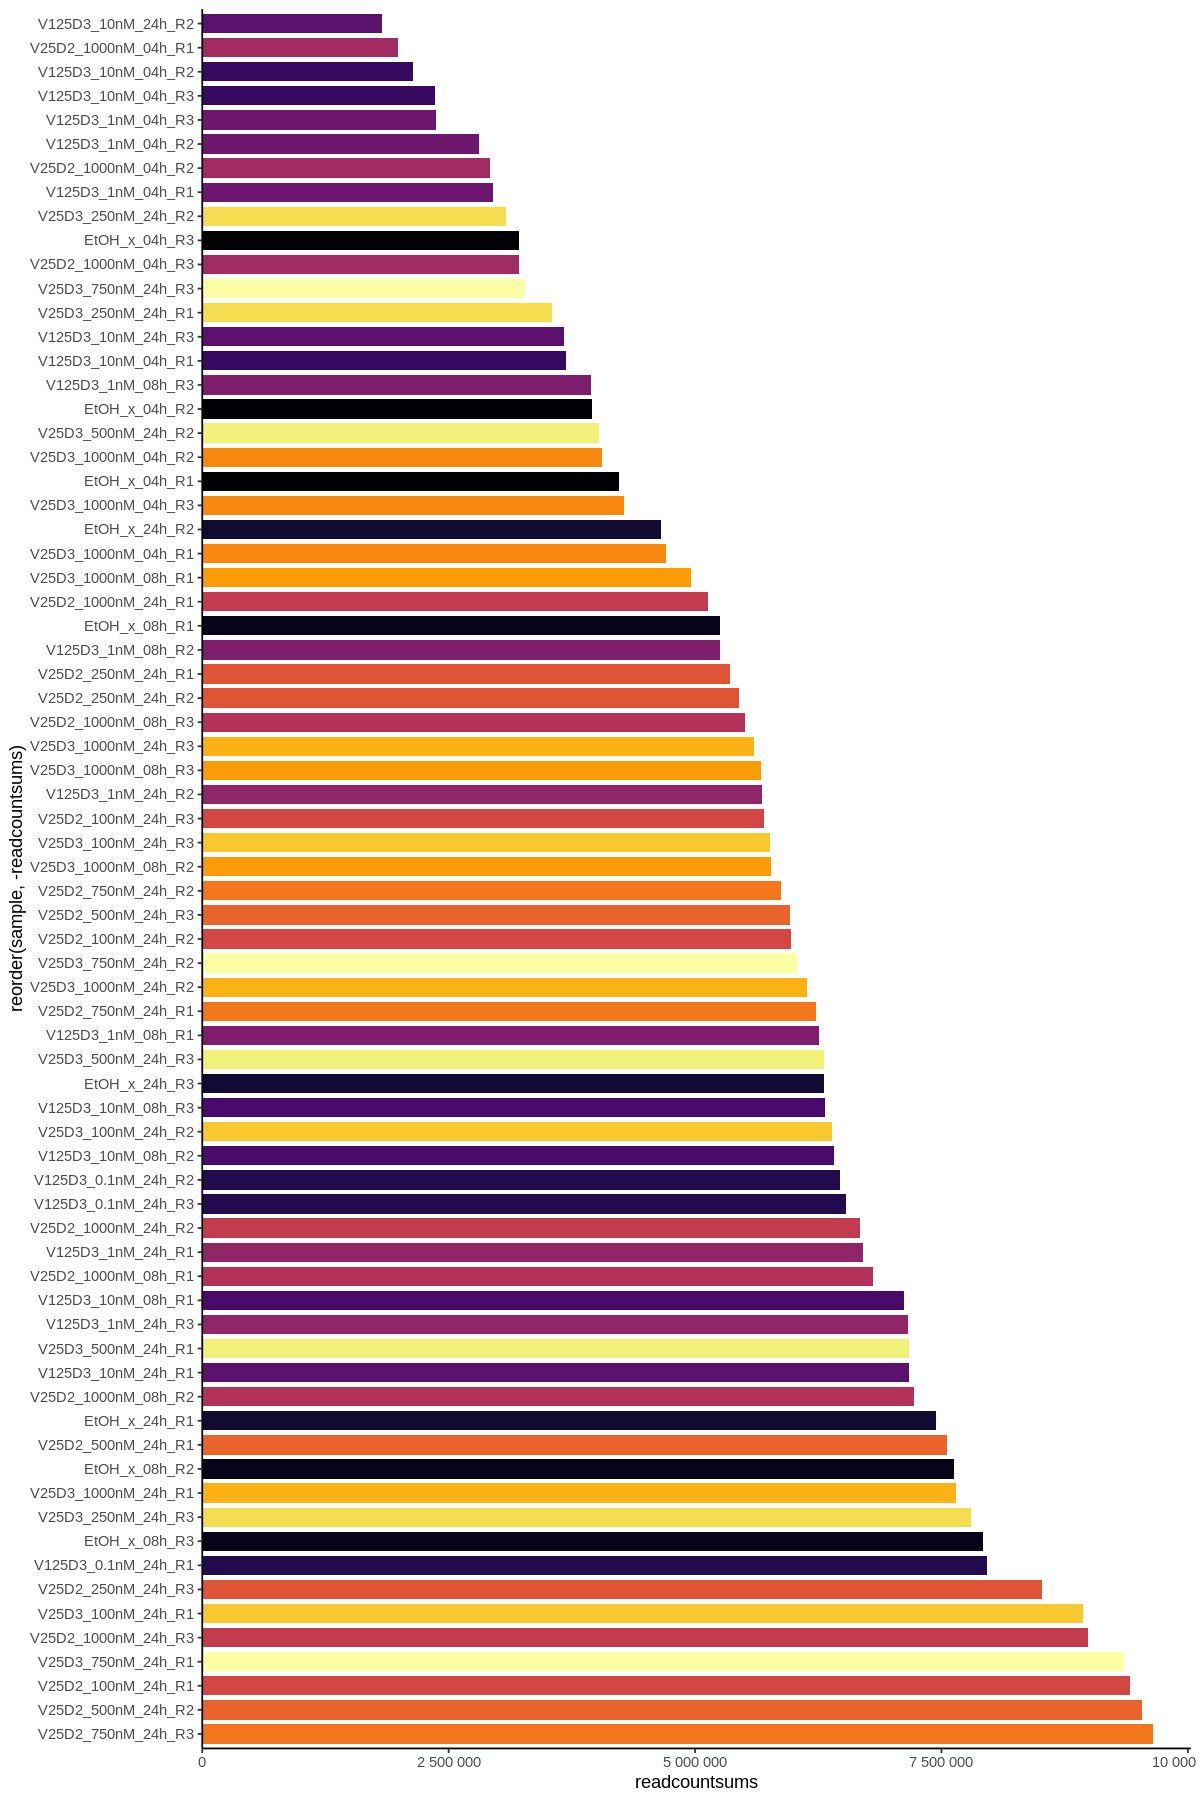

In [26]:
fig (10,15)

point <- scales::format_format(big.mark = " ", decimal.mark = ",", scientific = FALSE)

p<-ggplot(data=df, 
          aes(x= reorder(sample, -readcountsums), 
              y=readcountsums, 
              fill = group))+ 
geom_bar(stat="identity",width = .8)+
  geom_vline(xintercept = 3000000)+
theme_classic()+ 
scale_fill_viridis_d(option = "inferno")+ 
coord_flip()+ theme(legend.position = "none")+ 
scale_y_continuous(labels = point,
                   expand = expansion(mult = c(0, 0.04)))
p

In [27]:
#ggsave(plot = p, filename = "./libsizes_plot_internalcheck.pdf", device = "pdf", width = 10, height = 15)

In [28]:
a <- cpm(y, normalized.lib.sizes=TRUE)

In [29]:
logcpm <- cpm(y, log=TRUE,normalized.lib.sizes=TRUE)
logcpm = as.data.frame (logcpm )

dim (logcpm)

logcpm %>%
filter (., row.names(.) %in% c("CYP27B1","CYP24A1"))

[1] 12939    72

EtOH_x_04h_R1 EtOH_x_04h_R2 EtOH_x_04h_R3 EtOH_x_08h_R1 EtOH_x_08h_R2
CYP24A1 -0.7397874    -0.1873970    -0.0001774442 8.617813      8.6873965    
CYP27B1  0.8809142     0.4916919     1.7108119233 1.044443      0.1834737    
        EtOH_x_08h_R3 EtOH_x_24h_R1 EtOH_x_24h_R2 EtOH_x_24h_R3
CYP24A1 8.5682077     7.0223731     8.825439533   8.1504685    
CYP27B1 0.6875597     0.5514473     0.001378347   0.5627492    
        V125D3_0.1nM_24h_R1 ⋯ V25D3_100nM_24h_R3 V25D3_250nM_24h_R1
CYP24A1 8.1343695           ⋯ 8.8093958           8.7545747        
CYP27B1 0.1534157           ⋯ 0.6875272          -0.1071961        
        V25D3_250nM_24h_R2 V25D3_250nM_24h_R3 V25D3_500nM_24h_R1
CYP24A1 9.8821921          10.074992053       9.991761          
CYP27B1 0.9422293          -0.001563972       1.255039          
        V25D3_500nM_24h_R2 V25D3_500nM_24h_R3 V25D3_750nM_24h_R1
CYP24A1 10.6007013         10.308181          10.6672503        
CYP27B1 -0.2622641          1.128392           0.5764047        
        V25D3_750nM_24h_R2 V25D3_750nM_24h_R3
CYP24A1 10.7615499         10.5922784        
CYP27B1  0.3963168          0.3060422

> A prior count of 5 is added to avoid logarithms of zero

> Decision taken to exclude 1 nM 1,25D at 04 h and 08 h samples (6 samples in total) after DGE analysis was performed

In [30]:
logcpm <- cpm(y, log=TRUE,normalized.lib.sizes=TRUE, prior.count = 5)
logcpm = as.data.frame (logcpm )

logcpm = logcpm
dim (logcpm)

logcpm %>%
filter (., row.names(.) %in% c("CYP27B1","CYP24A1"))

[1] 12939    72

EtOH_x_04h_R1 EtOH_x_04h_R2 EtOH_x_04h_R3 EtOH_x_08h_R1 EtOH_x_08h_R2
CYP24A1 0.1689674     0.4891467     0.6090954     8.619740      8.689233     
CYP27B1 1.2430393     0.9497351     1.9255715     1.371835      0.732087     
        EtOH_x_08h_R3 EtOH_x_24h_R1 EtOH_x_24h_R2 EtOH_x_24h_R3
CYP24A1 8.570202      7.0281908     8.8271080     8.153132     
CYP27B1 1.094899      0.9934789     0.6101155     1.001807     
        V125D3_0.1nM_24h_R1 ⋯ V25D3_100nM_24h_R3 V25D3_250nM_24h_R1
CYP24A1 8.137063            ⋯ 8.811083           8.7563272         
CYP27B1 0.711605            ⋯ 1.094875           0.5398449         
        V25D3_250nM_24h_R2 V25D3_250nM_24h_R3 V25D3_500nM_24h_R1
CYP24A1 9.882994           10.0756931         9.992504          
CYP27B1 1.290967            0.6081867         1.542090          
        V25D3_500nM_24h_R2 V25D3_500nM_24h_R3 V25D3_750nM_24h_R1
CYP24A1 10.6011878         10.30878           10.667715         
CYP27B1  0.4427621          1.43913            1.011892         
        V25D3_750nM_24h_R2 V25D3_750nM_24h_R3
CYP24A1 10.7619850         10.5927678        
CYP27B1  0.8809352          0.8169983

In [31]:
head (a)

EtOH_x_04h_R1 EtOH_x_04h_R2 EtOH_x_04h_R3 EtOH_x_08h_R1 EtOH_x_08h_R2
EEF1A1  9406.359      9434.708     9694.522       7952.811      8018.488    
THBS1  10449.743     10368.835     9228.114      10843.912     10759.947    
AHNAK   4732.508      4709.171     4679.991       4625.838      4638.687    
ACTB    3344.395      3218.897     3382.429       3623.009      3591.972    
HLA-B   3802.211      3941.598     4111.597       3308.899      3315.666    
FTH1    3609.342      3499.742     3623.428       3772.929      3783.854    
       EtOH_x_08h_R3 EtOH_x_24h_R1 EtOH_x_24h_R2 EtOH_x_24h_R3
EEF1A1 8499.660      8472.716      7972.028      7498.353     
THBS1  8911.139      3017.506      2423.101      3250.649     
AHNAK  5128.177      4512.248      4348.221      5086.524     
ACTB   3505.324      7655.780      6276.812      5684.049     
HLA-B  3631.351      3847.686      3522.085      3307.955     
FTH1   3951.460      6351.330      5299.286      5212.725     
       V125D3_0.1nM_24h_R1 ⋯ V25D3_100nM_24h_R3 V25D3_250nM_24h_R1
EEF1A1 7350.706            ⋯ 7757.838           7344.551          
THBS1  7669.821            ⋯ 4613.187           5532.477          
AHNAK  4491.237            ⋯ 4056.522           4020.729          
ACTB   5302.296            ⋯ 7618.311           6615.848          
HLA-B  3142.012            ⋯ 3814.017           3511.129          
FTH1   4705.209            ⋯ 5608.774           5062.477          
       V25D3_250nM_24h_R2 V25D3_250nM_24h_R3 V25D3_500nM_24h_R1
EEF1A1 7178.236           7443.314           7575.4688         
THBS1  3188.302           4189.775            237.0431         
AHNAK  3783.163           3839.254           3313.4445         
ACTB   4906.893           5964.563           2823.2025         
HLA-B  3432.468           3703.041           3400.6047         
FTH1   4009.103           5170.766           2065.9135         
       V25D3_500nM_24h_R2 V25D3_500nM_24h_R3 V25D3_750nM_24h_R1
EEF1A1 7071.0996          6996.4823          7302.5464         
THBS1   362.8622           321.1234           226.9244         
AHNAK  3127.9643          2977.3144          2909.2575         
ACTB   2602.1646          2593.3126          2584.2205         
HLA-B  3305.1649          3220.2605          3397.7464         
FTH1   2115.5279          2033.6797          1751.5076         
       V25D3_750nM_24h_R2 V25D3_750nM_24h_R3
EEF1A1 7879.8031          6830.0894         
THBS1   252.4113           192.5633         
AHNAK  3036.0181          3003.6327         
ACTB   2559.3665          2488.2601         
HLA-B  3405.2983          3346.8206         
FTH1   1937.5140          1619.3626

## Modelmatrix

In [32]:
design <- model.matrix(~0+Group) 
colnames(design) <- levels(Group)
head (design) 

EtOH_x_04h EtOH_x_08h EtOH_x_24h V125D3_0.1nM_24h V125D3_10nM_04h
1 1          0          0          0                0              
2 1          0          0          0                0              
3 1          0          0          0                0              
4 0          1          0          0                0              
5 0          1          0          0                0              
6 0          1          0          0                0              
  V125D3_10nM_08h V125D3_10nM_24h V125D3_1nM_04h V125D3_1nM_08h V125D3_1nM_24h
1 0               0               0              0              0             
2 0               0               0              0              0             
3 0               0               0              0              0             
4 0               0               0              0              0             
5 0               0               0              0              0             
6 0               0               0              0              0             
  ⋯ V25D2_250nM_24h V25D2_500nM_24h V25D2_750nM_24h V25D3_1000nM_04h
1 ⋯ 0               0               0               0               
2 ⋯ 0               0               0               0               
3 ⋯ 0               0               0               0               
4 ⋯ 0               0               0               0               
5 ⋯ 0               0               0               0               
6 ⋯ 0               0               0               0               
  V25D3_1000nM_08h V25D3_1000nM_24h V25D3_100nM_24h V25D3_250nM_24h
1 0                0                0               0              
2 0                0                0               0              
3 0                0                0               0              
4 0                0                0               0              
5 0                0                0               0              
6 0                0                0               0              
  V25D3_500nM_24h V25D3_750nM_24h
1 0               0              
2 0               0              
3 0               0              
4 0               0              
5 0               0              
6 0               0

[1] 0.003698753

[1] 0.06081738

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05331 0.05801 0.06464 0.08886 0.10471 0.22143 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.009882 0.048464 0.063323 0.097667 0.097837 4.430567 

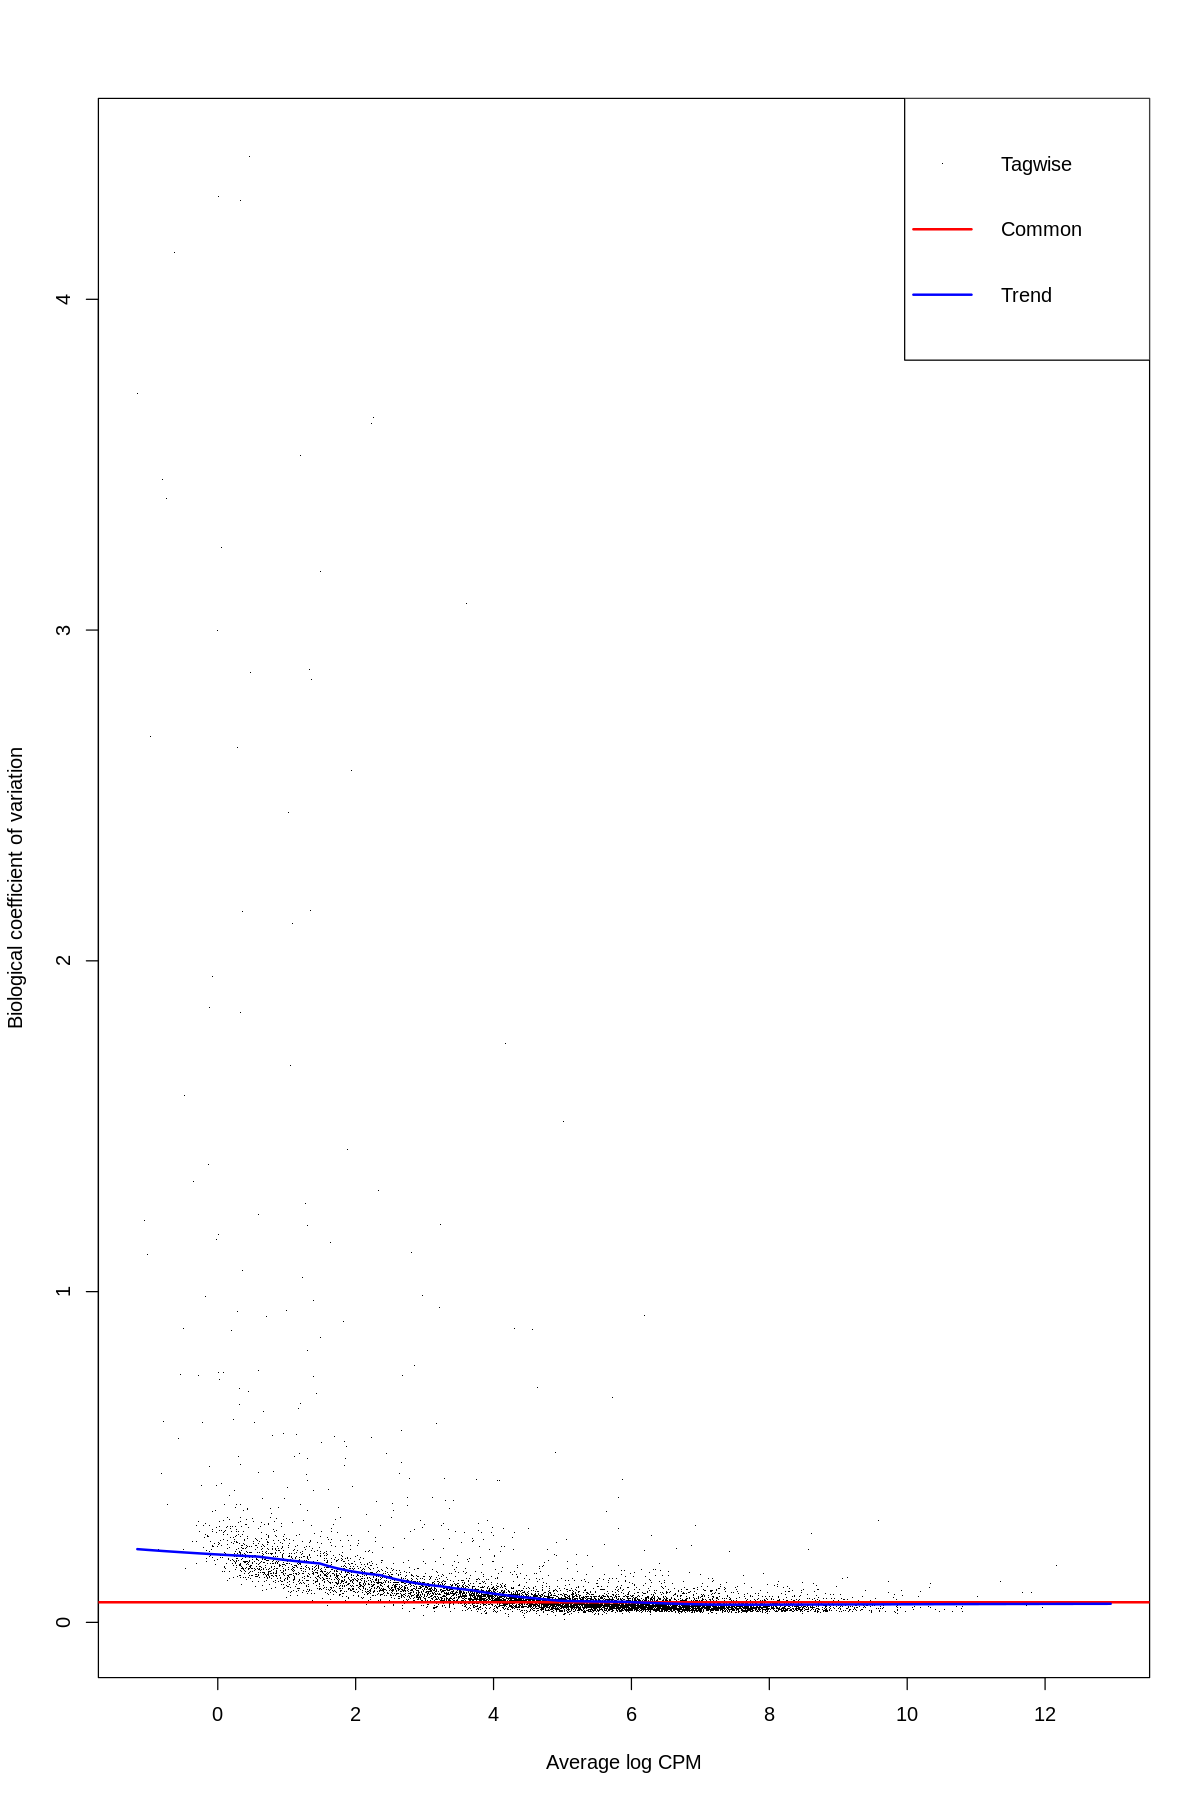

In [33]:
#Estimate dispersion
y <- estimateDisp(y, design, robust=TRUE) #The estimation is also robustiﬁed against potential outlier genes.
y$common.dispersion
sqrt(y$common.dispersion)

summary (sqrt(y$trended.dispersion))
summary(sqrt(y$tagwise.dispersion))

BCV = plotBCV(y, cex = 0.1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2343 22.8712 22.8712 21.1553 22.8712 22.8712 

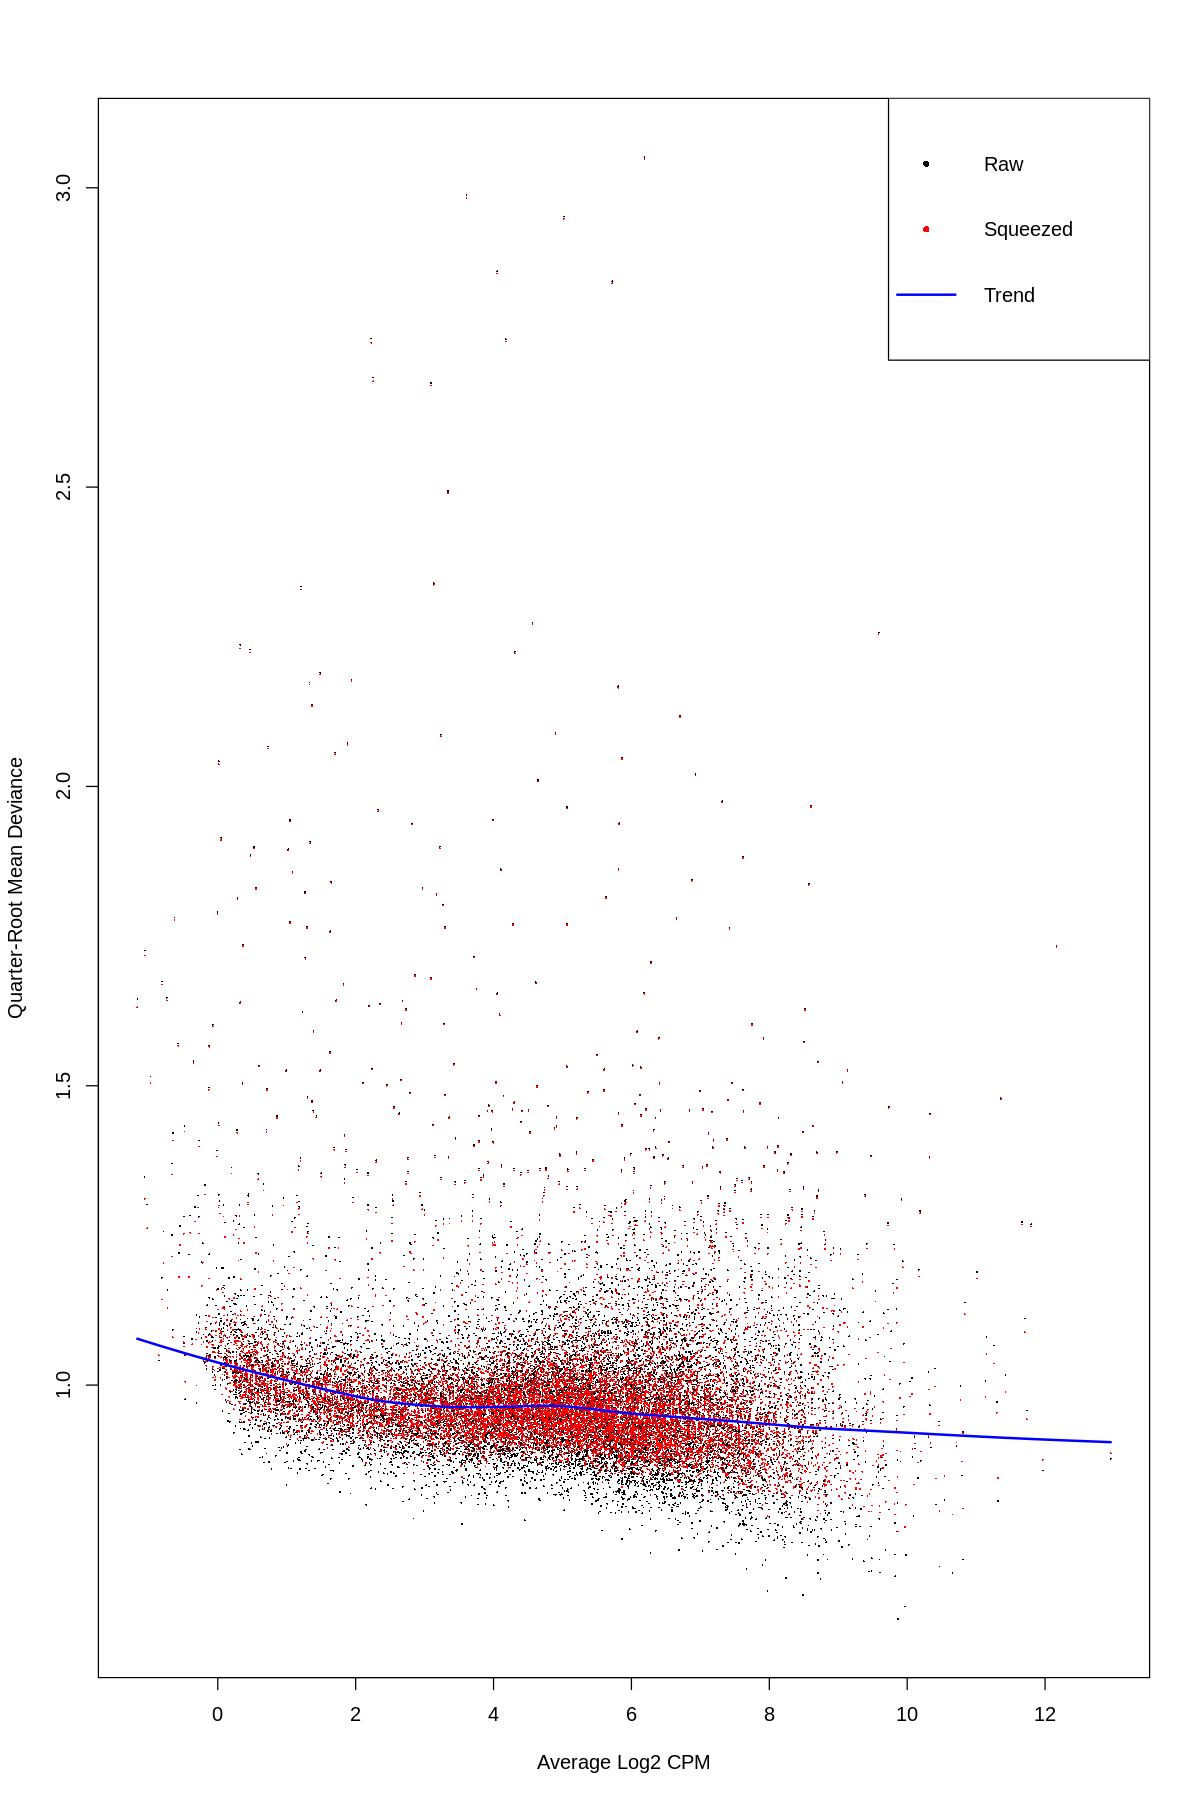

In [34]:
fit <- glmQLFit(y,design, robust=TRUE) #Setting robust=TRUE in glmQLFit is strongly recommended 
plotQLDisp(fit)
summary(fit$df.prior)

In [35]:
trtU <- unique (sampleinfo$Group)
trtU

[1] EtOH_x_04h       EtOH_x_08h       EtOH_x_24h       V125D3_0.1nM_24h
 [5] V125D3_10nM_04h  V125D3_10nM_08h  V125D3_10nM_24h  V125D3_1nM_04h  
 [9] V125D3_1nM_08h   V125D3_1nM_24h   V25D2_1000nM_04h V25D2_1000nM_08h
[13] V25D2_1000nM_24h V25D2_100nM_24h  V25D2_250nM_24h  V25D2_500nM_24h 
[17] V25D2_750nM_24h  V25D3_1000nM_04h V25D3_1000nM_08h V25D3_1000nM_24h
[21] V25D3_100nM_24h  V25D3_250nM_24h  V25D3_500nM_24h  V25D3_750nM_24h 
24 Levels: EtOH_x_04h EtOH_x_08h EtOH_x_24h ... V25D3_750nM_24h

In [36]:
trt <- as.data.frame (trtU)

In [37]:
my.contrasts <- makeContrasts(
    
V125D3_1nM_24h=
V125D3_1nM_24h-EtOH_x_24h,  
#################################### 
V125D3_10nM_04h=
V125D3_10nM_04h-EtOH_x_04h,
    
V125D3_10nM_08h=
V125D3_10nM_08h-EtOH_x_08h,

V125D3_10nM_24h=
V125D3_10nM_24h-EtOH_x_24h,  
######################################  

V125D3_0.1nM_24h=
V125D3_0.1nM_24h-EtOH_x_24h,
    
#############################################
V25D3_1000nM_04h=
V25D3_1000nM_04h-EtOH_x_04h,
    
V25D3_1000nM_08h=
V25D3_1000nM_08h-EtOH_x_08h,

V25D3_1000nM_24h=
V25D3_1000nM_24h-EtOH_x_24h,  
#################################### 
V25D2_1000nM_04h=
V25D2_1000nM_04h-EtOH_x_04h,
    
V25D2_1000nM_08h=
V25D2_1000nM_08h-EtOH_x_08h,

V25D2_1000nM_24h=
V25D2_1000nM_24h-EtOH_x_24h,   
###################################### 
   
V25D3_100nM_24h=
V25D3_100nM_24h-EtOH_x_24h,

V25D3_250nM_24h=
V25D3_250nM_24h-EtOH_x_24h,
    
V25D3_500nM_24h=
V25D3_500nM_24h-EtOH_x_24h,   
    
V25D3_750nM_24h=
V25D3_750nM_24h-EtOH_x_24h,
    
############################ 
    
V25D2_100nM_24h=
V25D2_100nM_24h-EtOH_x_24h,

V25D2_250nM_24h=
V25D2_250nM_24h-EtOH_x_24h,
    
V25D2_500nM_24h=
V25D2_500nM_24h-EtOH_x_24h,   
    
V25D2_750nM_24h=
V25D2_750nM_24h-EtOH_x_24h,
    
##############

levels = colnames(design))      

In [38]:
tr_11 <- glmTreat(fit, contrast=my.contrasts[,"V125D3_1nM_24h"],lfc=log2(2)) 

tr_12 <- glmTreat(fit, contrast=my.contrasts[,"V125D3_10nM_04h"],lfc=log2(1.5))
tr_13 <- glmTreat(fit, contrast=my.contrasts[,"V125D3_10nM_08h"],lfc=log2(1.5))
tr_14 <- glmTreat(fit, contrast=my.contrasts[,"V125D3_10nM_24h"],lfc=log2(2))

tr_15 <- glmTreat(fit, contrast=my.contrasts[,"V125D3_0.1nM_24h"],lfc=log2(2))

tr_16 <- glmTreat(fit, contrast=my.contrasts[,"V25D3_1000nM_04h"],lfc=log2(1.5)) 
tr_17 <- glmTreat(fit, contrast=my.contrasts[,"V25D3_1000nM_08h"],lfc=log2(1.5)) 
tr_18 <- glmTreat(fit, contrast=my.contrasts[,"V25D3_1000nM_24h"],lfc=log2(2))

tr_19 <- glmTreat(fit, contrast=my.contrasts[,"V25D2_1000nM_04h"],lfc=log2(1.5)) 
tr_20 <- glmTreat(fit, contrast=my.contrasts[,"V25D2_1000nM_08h"],lfc=log2(1.5)) 
tr_21 <- glmTreat(fit, contrast=my.contrasts[,"V25D2_1000nM_24h"],lfc=log2(2))

tr_22 <- glmTreat(fit, contrast=my.contrasts[,"V25D3_100nM_24h"],lfc=log2(2)) 
tr_23 <- glmTreat(fit, contrast=my.contrasts[,"V25D3_250nM_24h"],lfc=log2(2))
tr_24 <- glmTreat(fit, contrast=my.contrasts[,"V25D3_500nM_24h"],lfc=log2(2))
tr_25 <- glmTreat(fit, contrast=my.contrasts[,"V25D3_750nM_24h"],lfc=log2(2))

tr_26 <- glmTreat(fit, contrast=my.contrasts[,"V25D2_100nM_24h"],lfc=log2(2)) 
tr_27 <- glmTreat(fit, contrast=my.contrasts[,"V25D2_250nM_24h"],lfc=log2(2))
tr_28 <- glmTreat(fit, contrast=my.contrasts[,"V25D2_500nM_24h"],lfc=log2(2))
tr_29 <- glmTreat(fit, contrast=my.contrasts[,"V25D2_750nM_24h"],lfc=log2(2))

In [39]:
save.image(file = "./data/workspace_glmtreat.RData")

In [40]:
#this is an ugly piece of code, sorry! didn't figure out a loop

sumTr_11 <- summary(decideTests(tr_11, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_12 <- summary(decideTests(tr_12, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_13 <- summary(decideTests(tr_13, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_14 <- summary(decideTests(tr_14, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_15 <- summary(decideTests(tr_15, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_16 <- summary(decideTests(tr_16, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_17 <- summary(decideTests(tr_17, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_18 <- summary(decideTests(tr_18, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_19 <- summary(decideTests(tr_19, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_20 <- summary(decideTests(tr_20, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 

sumTr_21 <- summary(decideTests(tr_21, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_22 <- summary(decideTests(tr_22, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_23 <- summary(decideTests(tr_23, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_24 <- summary(decideTests(tr_24, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_25 <- summary(decideTests(tr_25, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_26 <- summary(decideTests(tr_26, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_27 <- summary(decideTests(tr_27, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_28 <- summary(decideTests(tr_28, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 
sumTr_29 <- summary(decideTests(tr_29, method="separate", adjust.method="BH", p.value=0.05,lfc=0)) 

In [41]:
sumTr005 <- cbind (         
                   sumTr_11, 
                   sumTr_12, 
                   sumTr_13, 
                   sumTr_14,
                   sumTr_15,                
                   sumTr_16, 
                   sumTr_17,
                   sumTr_18,                
                   sumTr_19, 
                   sumTr_20,
                   
                   sumTr_21, 
                   sumTr_22, 
                   sumTr_23, 
                   sumTr_24,
                   sumTr_25,                
                   sumTr_26, 
                   sumTr_27,
                   sumTr_28,                
                   sumTr_29
    
                  ) %>% # 
  t()

sumTr005
sumTr005 <- as.data.frame(sumTr005)

Down NotSig Up 
-1*EtOH_x_24h 1*V125D3_1nM_24h   133  12742   64
-1*EtOH_x_04h 1*V125D3_10nM_04h    3  12923   13
-1*EtOH_x_08h 1*V125D3_10nM_08h  112  12792   35
-1*EtOH_x_24h 1*V125D3_10nM_24h  256  12599   84
-1*EtOH_x_24h 1*V125D3_0.1nM_24h   5  12930    4
-1*EtOH_x_04h 1*V25D3_1000nM_04h   5  12906   28
-1*EtOH_x_08h 1*V25D3_1000nM_08h 116  12790   33
-1*EtOH_x_24h 1*V25D3_1000nM_24h 292  12531  116
-1*EtOH_x_04h 1*V25D2_1000nM_04h   1  12919   19
-1*EtOH_x_08h 1*V25D2_1000nM_08h 103  12802   34
-1*EtOH_x_24h 1*V25D2_1000nM_24h 348  12515   76
-1*EtOH_x_24h 1*V25D3_100nM_24h    0  12939    0
-1*EtOH_x_24h 1*V25D3_250nM_24h    0  12939    0
-1*EtOH_x_24h 1*V25D3_500nM_24h  266  12588   85
-1*EtOH_x_24h 1*V25D3_750nM_24h  320  12510  109
-1*EtOH_x_24h 1*V25D2_100nM_24h    0  12939    0
-1*EtOH_x_24h 1*V25D2_250nM_24h   13  12904   22
-1*EtOH_x_24h 1*V25D2_500nM_24h  266  12560  113
-1*EtOH_x_24h 1*V25D2_750nM_24h  307  12488  144

In [42]:
sumTr005$Total <- (sumTr005$Down + sumTr005$Up)
sumTr005$Ratio<- (sumTr005$Up/sumTr005$Down)


sumTr005[, c(2:5)] <- sapply(sumTr005[, c(2:5)], as.numeric)
#sumTr005 
sumTr005  =sumTr005  %>%
mutate(round(., 2)) 

col_order = c("Total","Up", "Down","Ratio", "NotSig")

sumTr005 = sumTr005 [, c(col_order)]

sumTr005 = sumTr005 %>%
rownames_to_column ("Experiment")

sumTr005

Experiment                       Total Up  Down Ratio NotSig
1  -1*EtOH_x_24h 1*V125D3_1nM_24h   197    64 133   0.48 12742 
2  -1*EtOH_x_04h 1*V125D3_10nM_04h   16    13   3   4.33 12923 
3  -1*EtOH_x_08h 1*V125D3_10nM_08h  147    35 112   0.31 12792 
4  -1*EtOH_x_24h 1*V125D3_10nM_24h  340    84 256   0.33 12599 
5  -1*EtOH_x_24h 1*V125D3_0.1nM_24h   9     4   5   0.80 12930 
6  -1*EtOH_x_04h 1*V25D3_1000nM_04h  33    28   5   5.60 12906 
7  -1*EtOH_x_08h 1*V25D3_1000nM_08h 149    33 116   0.28 12790 
8  -1*EtOH_x_24h 1*V25D3_1000nM_24h 408   116 292   0.40 12531 
9  -1*EtOH_x_04h 1*V25D2_1000nM_04h  20    19   1  19.00 12919 
10 -1*EtOH_x_08h 1*V25D2_1000nM_08h 137    34 103   0.33 12802 
11 -1*EtOH_x_24h 1*V25D2_1000nM_24h 424    76 348   0.22 12515 
12 -1*EtOH_x_24h 1*V25D3_100nM_24h    0     0   0    NaN 12939 
13 -1*EtOH_x_24h 1*V25D3_250nM_24h    0     0   0    NaN 12939 
14 -1*EtOH_x_24h 1*V25D3_500nM_24h  351    85 266   0.32 12588 
15 -1*EtOH_x_24h 1*V25D3_750nM_24h  429   109 320   0.34 12510 
16 -1*EtOH_x_24h 1*V25D2_100nM_24h    0     0   0    NaN 12939 
17 -1*EtOH_x_24h 1*V25D2_250nM_24h   35    22  13   1.69 12904 
18 -1*EtOH_x_24h 1*V25D2_500nM_24h  379   113 266   0.42 12560 
19 -1*EtOH_x_24h 1*V25D2_750nM_24h  451   144 307   0.47 12488

In [43]:
#wb <- createWorkbook() 
#addWorksheet(wb, sheetName = "FC 1.5 & FC 2")  #,  rowNames = TRUE
#header_st <- createStyle(textDecoration = "Bold")
#addFilter(wb, 1, row = 1, cols = 1:ncol(sumTr005)) 
#freezePane(wb, 1, firstRow = TRUE)
#writeData(wb, sheet = "FC 1.5 & FC 2", x = sumTr005, headerStyle = header_st) #, withFilter = TRUE , style = styleT
#saveWorkbook(wb, "./Targetssummary-no expr threshold.xlsx", overwrite = TRUE)
#saveWorkbook(wb, "/Users/andreahanel/Dropbox/Andrea II./Project VitDHiD-Doseresponse_3x/DGE_Ind14_norm.xlsx",  overwrite = TRUE)

In [44]:
###################### CA 2021 1nM time

V125D3_1nM_24h<-
topTags (
    tr_11, n=Inf, sort.by = "none",  adjust.method ="BH")

###################### CA 2021 10 nM time

V125D3_10nM_04h<-
topTags (
    tr_12, n=Inf, sort.by = "none",  adjust.method ="BH")

V125D3_10nM_08h<-
topTags (
    tr_13, n=Inf, sort.by = "none",  adjust.method ="BH")

V125D3_10nM_24h<-
topTags (
    tr_14, n=Inf, sort.by = "none",  adjust.method ="BH")

###################### CA 2021 V125D3_0.1nM_24h

V125D3_0.1nM_24h<-
topTags (
    tr_15, n=Inf, sort.by = "none",  adjust.method ="BH")

###################### CA 2021 25D3 1000 nM

V25D3_1000nM_04h<-
topTags (
    tr_16, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D3_1000nM_08h<-
topTags (
    tr_17, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D3_1000nM_24h<-
topTags (
    tr_18, n=Inf, sort.by = "none",  adjust.method ="BH")

###################### CA 2021 25D3 1000 nM

V25D2_1000nM_04h<-
topTags (
    tr_19, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D2_1000nM_08h<-
topTags (
    tr_20, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D2_1000nM_24h<-
topTags (
    tr_21, n=Inf, sort.by = "none",  adjust.method ="BH")

###################### CA 2021 concentrations cascade

V25D3_100nM_24h<-
topTags (
    tr_22, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D3_250nM_24h<-
topTags (
    tr_23, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D3_500nM_24h<-
topTags (
    tr_24, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D3_750nM_24h<-
topTags (
    tr_25, n=Inf, sort.by = "none",  adjust.method ="BH")

###################### CA 2021 concentrations cascade

V25D2_100nM_24h<-
topTags (
    tr_26, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D2_250nM_24h<-
topTags (
    tr_27, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D2_500nM_24h<-
topTags (
    tr_28, n=Inf, sort.by = "none",  adjust.method ="BH")

V25D2_750nM_24h<-
topTags (
    tr_29, n=Inf, sort.by = "none",  adjust.method ="BH")


In [45]:
###################### CA 2021 1nM

V125D3_1nM_24h <-
as.data.frame(V125D3_1nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V125D3_1nM_24h = logCPM,
         logFC_V125D3_1nM_24h = logFC, 
         FDR_V125D3_1nM_24h = FDR) 

############################## CA 2021 10 nM time

V125D3_10nM_04h <-
as.data.frame(V125D3_10nM_04h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V125D3_10nM_04h = logCPM,
         logFC_V125D3_10nM_04h = logFC, 
         FDR_V125D3_10nM_04h = FDR) 

V125D3_10nM_08h <-
as.data.frame(V125D3_10nM_08h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V125D3_10nM_08h = logCPM,
         logFC_V125D3_10nM_08h = logFC, 
         FDR_V125D3_10nM_08h = FDR) 

V125D3_10nM_24h <-
as.data.frame(V125D3_10nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V125D3_10nM_24h = logCPM,
         logFC_V125D3_10nM_24h = logFC, 
         FDR_V125D3_10nM_24h = FDR) 

###################### CA 2021 V125D3_0.1nM_24h

V125D3_0.1nM_24h<-
as.data.frame(V125D3_0.1nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V125D3_0.1nM_24h = logCPM,
         logFC_V125D3_0.1nM_24h = logFC, 
         FDR_V125D3_0.1nM_24h = FDR) 

###################### CA 2021 25D3 1000 nM

V25D3_1000nM_04h<-
as.data.frame(V25D3_1000nM_04h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(.,  
         logCPM_V25D3_1000nM_04h = logCPM,
         logFC_V25D3_1000nM_04h = logFC, 
         FDR_V25D3_1000nM_04h = FDR) 

V25D3_1000nM_08h<-
as.data.frame(V25D3_1000nM_08h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V25D3_1000nM_08h = logCPM,
         logFC_V25D3_1000nM_08h = logFC, 
         FDR_V25D3_1000nM_08h = FDR) 

V25D3_1000nM_24h<-
as.data.frame(V25D3_1000nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V25D3_1000nM_24h = logCPM,
         logFC_V25D3_1000nM_24h = logFC, 
         FDR_V25D3_1000nM_24h = FDR)

###################### CA 2021 25D2 1000 nM

V25D2_1000nM_04h<-
as.data.frame(V25D2_1000nM_04h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(.,  
         logCPM_V25D2_1000nM_04h = logCPM,
         logFC_V25D2_1000nM_04h = logFC, 
         FDR_V25D2_1000nM_04h = FDR)

V25D2_1000nM_08h<-
as.data.frame(V25D2_1000nM_08h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V25D2_1000nM_08h = logCPM,
         logFC_V25D2_1000nM_08h = logFC, 
         FDR_V25D2_1000nM_08h = FDR)

V25D2_1000nM_24h<-
as.data.frame(V25D2_1000nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V25D2_1000nM_24h = logCPM,
         logFC_V25D2_1000nM_24h = logFC, 
         FDR_V25D2_1000nM_24h = FDR)

###################### CA 2021 concentrations cascade

V25D3_100nM_24h<-
as.data.frame(V25D3_100nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(.,  
         logCPM_V25D3_100nM_24h = logCPM,
         logFC_V25D3_100nM_24h = logFC, 
         FDR_V25D3_100nM_24h = FDR)

V25D3_250nM_24h<-
as.data.frame(V25D3_250nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V25D3_250nM_24h = logCPM,
         logFC_V25D3_250nM_24h = logFC, 
         FDR_V25D3_250nM_24h = FDR)

V25D3_500nM_24h<-
as.data.frame(V25D3_500nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V25D3_500nM_24h = logCPM,
         logFC_V25D3_500nM_24h = logFC, 
         FDR_V25D3_500nM_24h = FDR)

V25D3_750nM_24h<-
as.data.frame(V25D3_750nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(., 
         logCPM_V25D3_750nM_24h = logCPM,
         logFC_V25D3_750nM_24h = logFC, 
         FDR_V25D3_750nM_24h = FDR)

###################### CA 2021 concentrations cascade

V25D2_100nM_24h<-
as.data.frame(V25D2_100nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(.,  
         logCPM_V25D2_100nM_24h = logCPM,
         logFC_V25D2_100nM_24h = logFC, 
         FDR_V25D2_100nM_24h = FDR)

V25D2_250nM_24h<-
as.data.frame(V25D2_250nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(.,  
         logCPM_V25D2_250nM_24h = logCPM,
         logFC_V25D2_250nM_24h = logFC, 
         FDR_V25D2_250nM_24h = FDR)

V25D2_500nM_24h<-
as.data.frame(V25D2_500nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(.,  
         logCPM_V25D2_500nM_24h = logCPM,
         logFC_V25D2_500nM_24h = logFC, 
         FDR_V25D2_500nM_24h = FDR)

V25D2_750nM_24h<-
as.data.frame(V25D2_750nM_24h) %>%
#mutate(absLogFC = abs(logFC)) %>%
select(., -(unshrunk.logFC)) %>%
select (., -(PValue)) %>%
  rename(.,  
         logCPM_V25D2_750nM_24h = logCPM,
         logFC_V25D2_750nM_24h = logFC, 
         FDR_V25D2_750nM_24h = FDR)


In [46]:
save.image(file = "./data/workspace_stats.RData")

In [47]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.5 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /research/users/andreha/miniconda3/envs/Mamba-14/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=C.UTF-8           LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] reshape2_1.4.4  openxlsx_4.2.5  forcats_0.5.1   stringr_1.4.0  
 [5] dplyr_1.0.7     purrr_0.3.4     readr_2.1.1     tidyr_1.1.4    
 [9] tibble_3.1.6    ggplot2_3.3.5   tidyverse_1.3.1 edgeR_3.36.0   
[13] limma_3.50.0   

loaded via a namespace (and not attached):
 [1] 